# Telco Churn Classification Project


## Imports

In [1]:
#imports
import acquire
import prepare
import model_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Acquire

I acquired the Telco_Churn dataset from a SQL server then exported to CSV to save locally.  In it's original form, the dataset contains 7,043 rows and 24 columns.

Each row(observation) represents a customer and each column represents a feature or metric that belongs to the customer.

In [2]:
#pulling dataset from SQL server using a formula from my acquire module
df_telco = acquire.get_telco_data()

## Prepare

To clean and prepare the data I converted non-integer data types to integers such as the "total_charges" column, removed columns with too much missing data, encoded
features with categorical variables, and split the data into train, validate and test datasets.

In [3]:
#used function from my prepare module to clean the data then displayed 
prepped_telco = prepare.prep_telco(df_telco)

#after prepping I split the data into 3 parts named "train", "validate", and "test" using a function from the prepare module.
train, validate, test = prepare.split_data(prepped_telco)

# Explore

Here are some questions and answers I explored to look for things that affect churn:

### 1) Are individual customers more likely to churn than those with a partner?

<AxesSubplot:xlabel='partner_Yes', ylabel='count'>

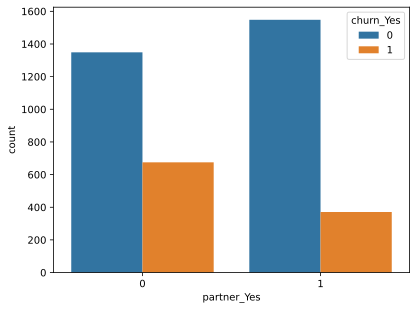

In [4]:
#This chart represents that customers with a partner are less likely to churn
sns.countplot(data=train, x='partner_Yes', hue = 'churn_Yes')


In [5]:
observed_partner = pd.crosstab(train.churn_Yes, train.partner_Yes)
chi2, p, degf, expected = stats.chi2_contingency(observed_partner)
print(f'chi^2 = {chi2:.4f}') 
print(f'p     = {p:.30f}')

chi^2 = 98.5779
p     = 0.000000000000000000000031248077


After performing a chi2 test, strong relationship between having a partner and rate of churn has been confirmed

Takeaway:

After performing a chi2 test, strong relationship between having a partner and not churning has been confirmed
- - -

### 2) Do higher monthly charges contribute to higher churn?

<AxesSubplot:xlabel='churn_Yes', ylabel='monthly_charges'>

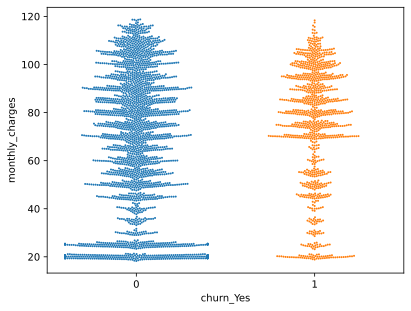

In [6]:
#chart for monthly charges vs churn
sns.swarmplot(data=train, x='churn_Yes', y='monthly_charges', size = 2)


Takeaway:

Customers with lower monthly charges are less likely to churn.  Each dot represents a customer and as you can see the overwhelming majority of customers who churn are in the upper range of monthly charges

- - -

 ### 3) Does a 2-year contract have less churn?

<AxesSubplot:xlabel='churn_Yes', ylabel='count'>

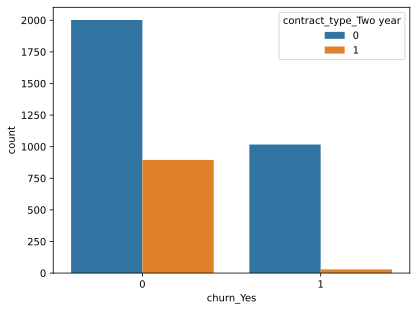

In [7]:
#chart comparing churn with having a two year contract
sns.countplot(data = train, x = 'churn_Yes', hue = 'contract_type_Two year')

chi^2 test 

Ho = 2-year contract type has no relatioship with churn 

Ha = 2-year contract type is related to churn


In [22]:
observed_contract_2_Year = pd.crosstab(train['contract_type_Two year'], train.churn_Yes)
chi2, p, degf, expected = stats.chi2_contingency(observed_contract_2_Year)
chi2, p, degf, expected

(337.16221680297303,
 2.6478708937714996e-75,
 1,
 array([[2218.11894497,  800.88105503],
        [ 678.88105503,  245.11894497]]))

Takeaway:

Two year contracts have lower churn than one year contracts

After performing chi2 test, I can confirm there is a correlation between 2 year contract type and churn


- - -

### 4) Does fiber optic service type have lower churn?

<AxesSubplot:xlabel='churn_Yes', ylabel='count'>

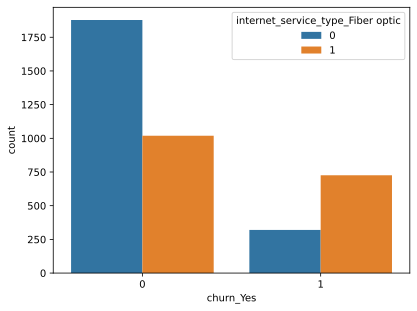

In [9]:
#chart representing customers who have fiber optic internet and churn or not churn
sns.countplot(data = train, x = 'churn_Yes', hue = 'internet_service_type_Fiber optic')

The chart above shows that customers with fiber optic service type are actually more likely to cancel.  Further analysis needed to see if it is due to higher monthly charges or dissatisfaction with the service.

Chi^2 test
Ho = Service type fiber optic has no relatioship with churn 

Ha = Service type fiber optic is related to churn

In [10]:
observed_Fiber_Optic = pd.crosstab(train['internet_service_type_Fiber optic'], train.churn_Yes)
chi2, p, degf, expected = stats.chi2_contingency(observed_Fiber_Optic)
chi2, p, degf, expected

(363.68055827796593,
 4.447993420103704e-81,
 1,
 array([[1614.91402485,  583.08597515],
        [1282.08597515,  462.91402485]]))

Takeaway:

After perform a chi^2 test I've confirmed that there is a significant correlation between having fiber optic service and churning

The chart above represents a significantly decreased likelihood of churn in longer tenured customers.

Below are two additional charts that I found interesting but did not explore further.  The first shows that higher tenure is less likely to churn.  The second shows that similar to customers with a partner, customers with dependents are less likely to churn.

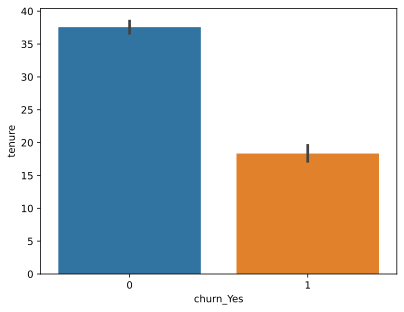

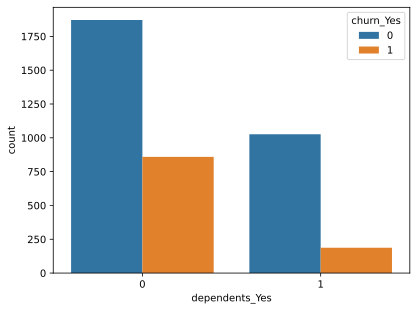

In [12]:
tenure_churn_barplot = sns.barplot(data = train, x = 'churn_Yes', y = 'tenure')
plt.show(tenure_churn_barplot)

has_dependents = sns.countplot(data=train, x='dependents_Yes', hue = 'churn_Yes')
plt.show(tenure_churn_barplot)


## Exploration Summary

Through exploration and statistics testing of the data I've found some drivers of churn:
- Single customers, customers with fiber optic service, and customers with higher monthly charges all contribute to higher churn
- 2 year contract types are proven to reduce churn


To increase customer retention consider offering discounts for 2 year contracts.

- - -

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In order to make predicitions on which customers will churn I will use several classification models.  I'll compare the accuracy of each model to the baseline and identify the most accurate model.

In [14]:
#using function from model_functions module to isolate the target variable which is churn
X_Train, y_Train, X_val, y_val, X_test, y_test = model_functions.isolate_target()

In [23]:
#code used to determine baseline
baseline = 1 - y_Train.mean()
baseline_percent = (baseline*100)
print(f'baseline equals:  {round(baseline_percent, 2)}% accuracy')

baseline equals:  73.47% accuracy


### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [17]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

In [18]:
model_functions.best_performing_model(X_Train, y_Train, X_test, y_test)

Random Forest
Test Accuracy: 81.05%


- - -
Scratch below

In [19]:
pd.DataFrame(y_test)

,churn_Yes
3160,0
1577,0
6823,1
3615,0
882,1
...,...
1097,1
6441,1
5985,0
2452,0


In [20]:
def get_baseline():
    X_Train, y_Train, X_val, y_val, X_test, y_test = model_functions.isolate_target()    
    baseline = 1 - y_Train.mean()
    baseline_percent = (baseline*100)
    print(f'baseline equals:  {round(baseline_percent, 2)}%')

get_baseline()

baseline equals:  73.47%


Scratch above
- - -

### Test Model

I've now chosen the best model and I will run it on unseen data below.

In [24]:
# Code that runs the best overall model on test data (this may be imported from a module)
model_functions.best_performing_model(X_Train, y_Train, X_test, y_test)

Random Forest
Test Accuracy: 81.05%


### Modeling Wrap 
This model improves upon the baseline by 7% and is recommended for production


## Conclusion

### Summary
In summary, through data exploration, statistics testing and modeling I identified contributors to churn and made predictions on which customer will churn.  Also,

### Recommendations
To increase customer retention consider offering discounts for 2 year contracts.  Doing this will address two drivers of churn with one change, shorter contracts and higher monthly charges.  Additionally, consider doing a customer satisfaction survey to see if there are problems with the fiber optic service or if it needs to be improved because of new competition.

### Next Steps
If given more time on this project I would look more deeply into the higher churn rate in customers with fiber optic service.  Some questions I have are:
    - Are customers cancelling fiber optic because it's bad?
    - Are they cancelling because it's too expensive?
    - How does our fiber optic service compare to our competitors in terms of speed, reliability and price?